Classifying movie reviews: A binary classification example

Two-class classification, or binary classification, is one of the most common kinds of machine learning problems. In this example, you’ll learn to classify movie reviews as positive or negative, based on the text content of the reviews.

In [20]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder

In [21]:
from tensorflow.keras.datasets import imdb
(X_train, y_train),(X_test, y_test) =  imdb.load_data(num_words=10000)

In [22]:
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [36]:
print(len(X_train))

25000


In [23]:
max([max(sequence) for sequence in X_train])

9999

In [28]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))  
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.                        
    return results
x_train = vectorize_sequences(X_train)             
x_test = vectorize_sequences(X_test)               

In [29]:
y_train = np.asarray(y_train).astype("float32")
y_test = np.asarray(y_test).astype("float32")

In [32]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
                         layers.Dense(16, activation='relu'),
                          layers.Dense(16, activation='relu'),
                          layers.Dense(1, activation='sigmoid')
])

In [33]:
model.compile(optimizer='rmsprop',
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [35]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [37]:
print(len(partial_x_train))

15000


In [38]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 43ms/step - loss: 0.5170 - accuracy: 0.7869 - val_loss: 0.3983 - val_accuracy: 0.8514
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3106 - accuracy: 0.9009 - val_loss: 0.3122 - val_accuracy: 0.8816
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2250 - accuracy: 0.9271 - val_loss: 0.3000 - val_accuracy: 0.8793
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1780 - accuracy: 0.9401 - val_loss: 0.2775 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1433 - accuracy: 0.9546 - val_loss: 0.2836 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1174 - accuracy: 0.9633 - val_loss: 0.2925 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0968 - accuracy: 0.9706 - val_loss: 0.3134 - val_accuracy: 0.8820
Epoch 8/20
30

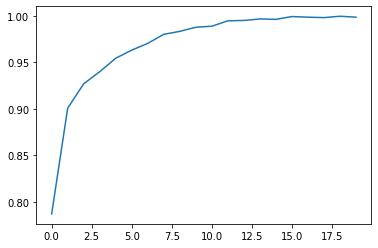

In [39]:
plt.plot(history.history['accuracy'])

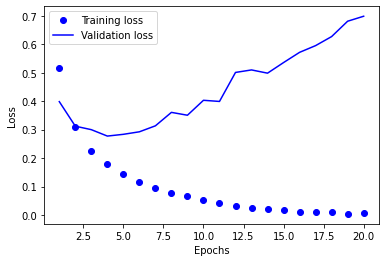

In [42]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")        
plt.plot(epochs, val_loss_values, "b", label="Validation loss")   
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

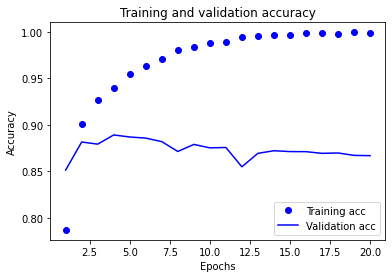

In [43]:
plt.clf()                           
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

When we plot our data, we see a flux in accuracy loss and validation which indicates that our data is overfitting on training data. After inspecting the data further, it is clear that optimal results occur after about 4 epochs of training, therefore, let's retrain the model and stopping after 4 epochs. 

In [44]:
model = keras.Sequential([
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train,epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4415 - accuracy: 0.8254
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2541 - accuracy: 0.9109
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1951 - accuracy: 0.9294
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2968 - accuracy: 0.8847


In [45]:
results

[0.29680612683296204, 0.8847200274467468]

In [46]:
model.predict(x_test)

array([[0.16948278],
       [0.99988794],
       [0.7275847 ],
       ...,
       [0.1270238 ],
       [0.05687334],
       [0.6356051 ]], dtype=float32)

In [52]:
print(y_test[-3])

0.0
